<a href="https://colab.research.google.com/github/Ayuningtyas65/MSIB/blob/main/Self_Learning_ML_2_Regresi_Lanjutan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity ML-2

Download dataset [di sini](https://drive.google.com/file/d/1ir-ilrC_m4XAny9tklloJc52oLITjUGy/view?usp=sharing).

1. Buat model regresi linier dan model regresi lainnya menggunakan dataset tersebut!
2. Evaluasi setiap model!
3. Tentukan dan jelaskan model yang paling baik!

Tri Mulyani Ayuningtyas_JumaTec

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv ('https://raw.githubusercontent.com/latief30/Latihan/main/Dataset/housing_price.csv')
data.head()

,total_rooms,housing_median_age,population,median_house_value
0,880.0,41.0,322.0,452600.0
1,7099.0,21.0,2401.0,358500.0
2,1467.0,52.0,496.0,352100.0
3,1274.0,52.0,558.0,341300.0
4,1627.0,52.0,565.0,342200.0


**ANALISIS KORELASI**

In [ ]:
data.corr()

,total_rooms,housing_median_age,population,median_house_value
total_rooms,1.000000,-0.033254,0.920196,0.253887
housing_median_age,-0.033254,1.000000,-0.062477,0.018831
population,0.920196,-0.062477,1.000000,0.129279
median_house_value,0.253887,0.018831,0.129279,1.000000


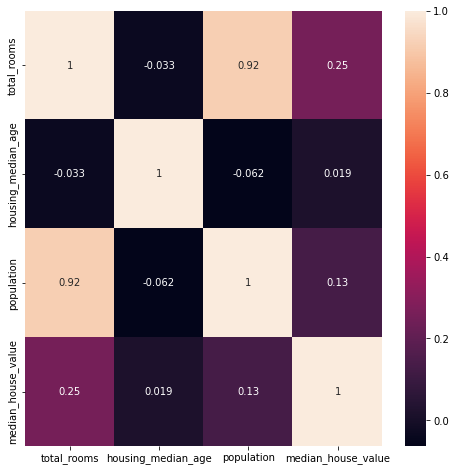

In [ ]:
# Visualisasi menggunakan heatmap
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

**SPLIT DATASET**

In [ ]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("Ukuran training dan testing data:")
print("Training dataset:", X_train.shape, y_train.shape) # 80% training data
print("Testing dataset:", y_test.shape) # 20% testing data

Ukuran training dan testing data:
Training dataset: (80, 3) (80,)
Testing dataset: (20,)


**MODELLING**

In [ ]:
# Training model Regresi Linier
LinearReg = LinearRegression().fit(X_train, y_train)

# Training model Lasso
LassoReg = Lasso(alpha=0.1).fit(X_train, y_train)

# Training model Ridge
RidgeReg = Ridge(alpha=0.1).fit(X_train, y_train)

# Training model Support Vectore Regression (SVR)
SVReg = SVR().fit(X_train, y_train)

# Training model Decision tree Regression (DTR)
DTReg = DecisionTreeRegressor(random_state=47).fit(X_train, y_train)

**EVALUASI MODEL MENGGUNAKAN METRIC MSE R2**

In [ ]:
# Hasil prediksi model Regresi linier
ypredtrain_reglin = LinearReg.predict(X_train)
ypredtest_reglin = LinearReg.predict(X_test)

# Hasil prediksi model Lasso
ypredtrain_lasso = LassoReg.predict(X_train)
ypredtest_lasso = LassoReg.predict(X_test)

# Hasil prediksi model Ridge
ypredtrain_ridge = RidgeReg.predict(X_train)
ypredtest_ridge = RidgeReg.predict(X_test)

# Hasil prediksi model SVR
ypredtrain_svr = SVReg.predict(X_train)
ypredtest_svr = SVReg.predict(X_test)

# hasil prediksi model DTR
ypredtrain_dtr = DTReg.predict(X_train)
ypredtest_dtr = DTReg.predict(X_test)

In [ ]:
# MSE model Regresi Linier
print('Nilai MSE data training Regresi Linier = ', mean_squared_error(y_train, ypredtrain_reglin))
print('Nilai MSE data testing Regresi Linier = ', mean_squared_error(y_test, ypredtest_reglin), '\n')

# MSE model Lasso
print('Nilai MSE data training Regresi Lasso = ', mean_squared_error(y_train, ypredtrain_lasso))
print('Nilai MSE data testing Regresi Lasso = ', mean_squared_error(y_test, ypredtest_lasso), '\n')

#MSE model Ridge
print('Nilai MSE data training Regresi Ridge = ', mean_squared_error(y_train, ypredtrain_ridge))
print('Nilai MSE data testing Regresi Ridge = ', mean_squared_error(y_test, ypredtest_ridge), '\n')

#MSE model SVR
print('Nilai MSE data training Regresi SVR = ', mean_squared_error(y_train, ypredtrain_svr))
print('Nilai MSE data testing Regresi SVR = ', mean_squared_error(y_test, ypredtest_svr), '\n')

#MSE model DTR
print('Nilai MSE data training Regresi DTR = ', mean_squared_error(y_train, ypredtrain_dtr))
print('Nilai MSE data testing Regresi DTR = ', mean_squared_error(y_test, ypredtest_dtr))

Nilai MSE data training Regresi Linier =  4803094063.322078
Nilai MSE data testing Regresi Linier =  8127181805.970065 

Nilai MSE data training Regresi Lasso =  4803094063.322152
Nilai MSE data testing Regresi Lasso =  8127181788.923589 

Nilai MSE data training Regresi Ridge =  4803094063.322078
Nilai MSE data testing Regresi Ridge =  8127181827.757988 

Nilai MSE data training Regresi SVR =  5948408542.012653
Nilai MSE data testing Regresi SVR =  9903742443.12862 

Nilai MSE data training Regresi DTR =  0.0
Nilai MSE data testing Regresi DTR =  14219714500.0


Hasil Evaluasi MSE Menunjukkan Bahwa :

Model | MSE traing data | MSE testing data | Keputusan
---|---|---|---|
Regresi Linier | 4803094063.322078 | 8127181805.970065 | overfit
Regresi Lasso | 4803094063.322152 | 8127181788.923589  | overfit
Regresi Ridge | 4803094063.322078 | 8127181827.757988  | overfit
SVR | 5948408542.012653 | 9903742443.12862  | overfit
DTR | 0.0 | 14219714500.0 | underfit

Dapat Disimpulkan tidak terdapat model yang terbaik

In [ ]:
# R^2 Score
print(f'R^2 score Regresi Linier: {LinearReg.score(X, Y)}')
print(f'R^2 score Regresi Lasso: {LassoReg.score(X, Y)}')
print(f'R^2 score Regresi Ridge: {RidgeReg.score(X, Y)}')
print(f'R^2 score SVR: {SVReg.score(X, Y)}')
print(f'R^2 score DT: {DTReg.score(X, Y)}')

R^2 score Regresi Linier: 0.1312824745405794
R^2 score Regresi Lasso: 0.1312824750822238
R^2 score Regresi Ridge: 0.13128247384826552
R^2 score SVR: -0.0707379234400054
R^2 score DT: 0.5481669759838637


Pilih model dengan R^2 score mendekati 1.

**Hasil evaluasi R^2 score menunjukkan bahwa DTR merupakan model terbaik. **

Text(0.5, 1.0, 'Prediction vs Real Data Regresi Linier')

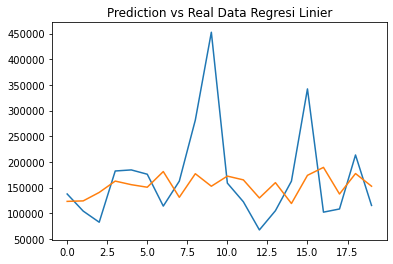

In [ ]:
plt.plot(y_test.values)
plt.plot(ypredtest_reglin)
plt.title('Prediction vs Real Data Regresi Linier')

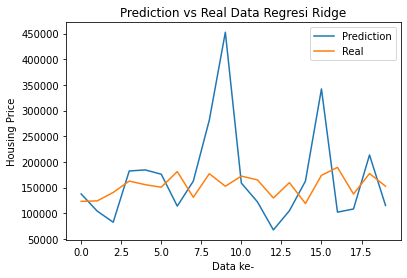

In [ ]:
plt.plot(y_test.values)
plt.plot(ypredtest_ridge)
plt.title('Prediction vs Real Data Regresi Ridge')
plt.xlabel("Data ke-")
plt.ylabel("Housing Price")
plt.legend(labels=['Prediction', "Real"])
plt.show()

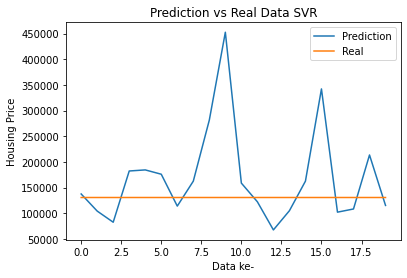

In [ ]:
plt.plot(y_test.values)
plt.plot(ypredtest_svr)
plt.title('Prediction vs Real Data SVR')
plt.xlabel("Data ke-")
plt.ylabel("Housing Price")
plt.legend(labels=['Prediction', "Real"])
plt.show()

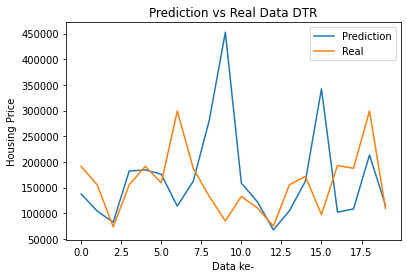

In [ ]:
plt.plot(y_test.values)
plt.plot(ypredtest_dtr)
plt.title('Prediction vs Real Data DTR')
plt.xlabel("Data ke-")
plt.ylabel("Housing Price")
plt.legend(labels=['Prediction', "Real"])
plt.show()

**KESIMPULAN**

Model DTR merupakan model terbaik berdasarkan hasil evaluasi menggunakan metrics MSE dan R^2.

In [ ]:
total_room = float(input('Input Total Room \t= '))
housing_median_age = float(input('Input Housing Median Age \t= '))
Population = float(input('Input Population\t= '))
data_baru = [[total_room, housing_median_age, Population]]

# Prediksi data baru menggunakan model DTR
hasil_prediksi = DTReg.predict(data_baru)
hasil_prediksi = float(hasil_prediksi)

# Cetak hasil prediksi (Profit)
print('\nPrediksi Median House Value', hasil_prediksi)

Input Total Room 	= 7099
Input Housing Median Age 	= 21
Input Population	= 2401

Prediksi Median House Value 358500.0
